# Intro.
- KAIST all day Test Bed 결과 확인


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import configparser
import scipy.io as sio

from sklearn import svm, datasets
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

TARGET_EVAL_DATASET = 'KAIST_All_Day(East)'

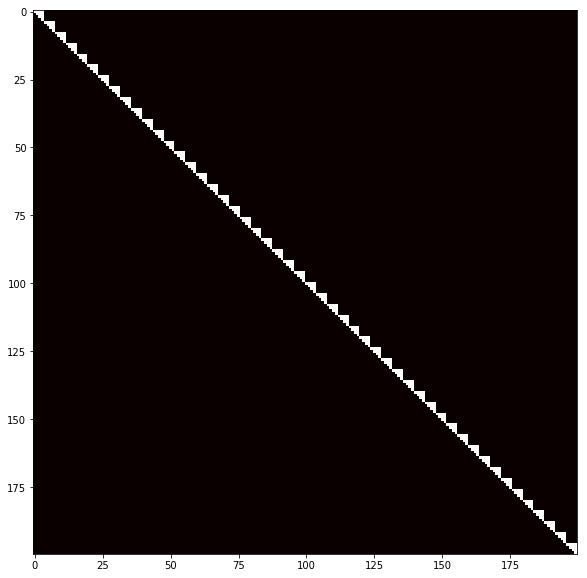

In [6]:
from glob import glob
images = glob('/media/dongwonshin/Ubuntu Data/Datasets/KAIST_All_Day/Synced_Data/%s/images/small_size/*.jpg' % TARGET_EVAL_DATASET)

GT_corr_mat = np.zeros((len(images), len(images)))
for i in range(0,len(images),4):
    for j in range(i,i+4):
        GT_corr_mat[i,j] = 1
    for j in range(i+1,i+4):
        GT_corr_mat[i+1,j] = 1
    for j in range(i+2,i+4):
        GT_corr_mat[i+2,j] = 1
    for j in range(i+3,i+4):
        GT_corr_mat[i+3,j] = 1
        
plt.figure(figsize=(10,10))
plt.imshow(GT_corr_mat, cmap = 'hot')
plt.show()

In [7]:
def PrecisionRecallCurve(GT_corr_mat, esti_corr_mat):

    precision, recall, _ = precision_recall_curve(GT_corr_mat.flatten(), esti_corr_mat.flatten())
    average_precision = average_precision_score(GT_corr_mat.flatten(), esti_corr_mat.flatten())


#     # Plot Precision-Recall curve
#     plt.clf()
#     plt.plot(recall, precision, lw=2, color='navy', label='Precision-Recall curve')
#     plt.xlabel('Recall')
#     plt.ylabel('Precision')
#     plt.ylim([0.0, 1.05])
#     plt.xlim([0.0, 1.0])
#     plt.title('Precision-Recall example: AUC={0:0.2f}'.format(average_precision))
#     plt.legend(loc="lower left")
#     plt.show()
    
    return precision, recall
    
    
def theLatestResult(path_pattern):
    result_dirs = sorted(glob(path_pattern))
    the_latest_result_path = result_dirs[-1]
    print(the_latest_result_path)
    corr_mat_path = the_latest_result_path + '/corr_matrix.txt'
    param_cfg_path = the_latest_result_path + '/parameters.cfg'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('General')))
    

    return corr_mat_path, param_cfg_path

def theSpecificResult(path):
    corr_mat_path = path + '/corr_matrix.txt'
    param_cfg_path = path + '/output_config.ini'
    
    config = configparser.ConfigParser()
    config.read(param_cfg_path)
    print(dict(config.items('Experiment_parameters')))
    
    return corr_mat_path, param_cfg_path, dict(config.items('Experiment_parameters'))

# K=10, L=5

{'eval_dataset': 'KAIST_All_Day(East)', 'cluster_center': '10', 'depth_level': '5', 'exp_method': 'orb', 'scoring_type': 'L1_NORM'}
{'eval_dataset': 'KAIST_All_Day(East)', 'cluster_center': '10', 'depth_level': '5', 'exp_method': 'brisk', 'scoring_type': 'L1_NORM'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'bigger_feature_size', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc', 'cluster_center': '10', 'depth_level': '5', 'exp_method': 'proposed method'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'bigger_feature_size', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc', 'cluster_center': '10', 'depth_level': '5', 'exp_method': 'SURF'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'large-scale-training', 'scoring_type': 'L1_NORM', 'eval_desc': 'small_size_512dim', 'cluster_center': '10', 'depth_level': '5', 'exp_method': 'proposed method'}


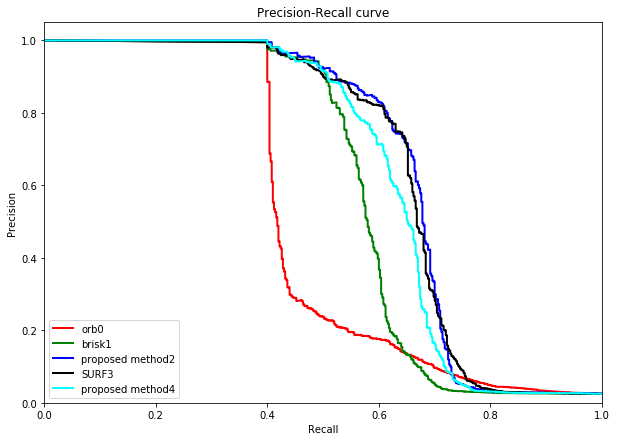

In [8]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-03-21-57',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-03-19-46',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-02-34-57',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-01-52-06',
'/home/dongwonshin/Desktop/DBoW2/build2/result/2017-09-13-00-28-54'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    if (params['eval_dataset'] == TARGET_EVAL_DATASET):
        curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    else:
        print(params)
        print('current eval dataset is not %s (which is the target)' % TARGET_EVAL_DATASET)
        
# Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt = 0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method'] + str(cnt))
    cnt+=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=5, L=5

{'eval_dataset': 'KAIST_All_Day(East)', 'cluster_center': '5', 'depth_level': '5', 'exp_method': 'orb', 'scoring_type': 'L1_NORM'}
{'eval_dataset': 'KAIST_All_Day(East)', 'cluster_center': '5', 'depth_level': '5', 'exp_method': 'brisk', 'scoring_type': 'L1_NORM'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'bigger_feature_size', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc', 'cluster_center': '5', 'depth_level': '5', 'exp_method': 'proposed method'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'bigger_feature_size', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc', 'cluster_center': '5', 'depth_level': '5', 'exp_method': 'SURF'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'large-scale-training', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc_512dim', 'cluster_center': '5', 'depth_level': '5', 'exp_method': 'proposed method'}


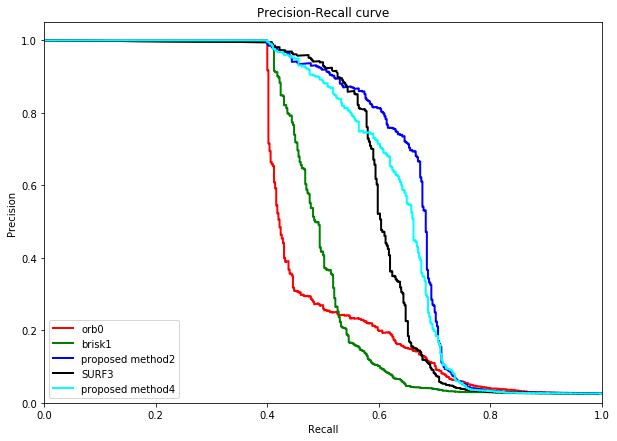

In [13]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-15-59-05',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-15-56-10',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-15-10-15',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-14-46-12',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-13-02-02-12'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    if (params['eval_dataset'] == TARGET_EVAL_DATASET):
        curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    else:
        print(params)
        print('current eval dataset is not %s (which is the target)' % TARGET_EVAL_DATASET)
        
# Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt = 0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method']+str(cnt))
    cnt +=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

# K=15, L=5

{'eval_dataset': 'KAIST_All_Day(East)', 'cluster_center': '15', 'depth_level': '5', 'exp_method': 'orb', 'scoring_type': 'L1_NORM'}
{'eval_dataset': 'KAIST_All_Day(East)', 'cluster_center': '15', 'depth_level': '5', 'exp_method': 'brisk', 'scoring_type': 'L1_NORM'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'bigger_feature_size', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc', 'cluster_center': '15', 'depth_level': '5', 'exp_method': 'proposed method'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'bigger_feature_size', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc', 'cluster_center': '15', 'depth_level': '5', 'exp_method': 'SURF'}
{'eval_dataset': 'KAIST_All_Day(East)', 'network_model': 'large-scale-training', 'scoring_type': 'L1_NORM', 'eval_desc': 'all_desc_512dim', 'cluster_center': '15', 'depth_level': '5', 'exp_method': 'proposed method'}


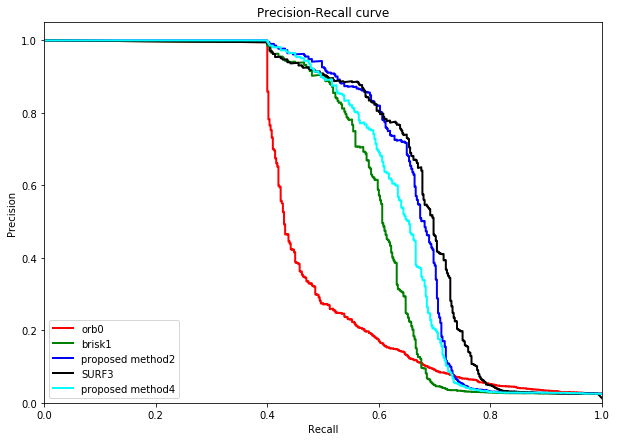

In [12]:
testcases = [
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-19-11-25',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-19-06-16',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-17-13-27',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-12-16-12-46',
'/home/dongwonshin/Desktop/LoopClosureDetectionTestBed/result_folder/2017-09-13-01-58-44'
]

curve_results = []
for testcase in testcases:
    corr_mat, param_cfg, params = theSpecificResult(testcase)
    esti_corr_mat = np.loadtxt(corr_mat)
    if (params['eval_dataset'] == TARGET_EVAL_DATASET):
        curve_results.append([PrecisionRecallCurve(GT_corr_mat, esti_corr_mat), params])
    else:
        print(params)
        print('current eval dataset is not %s (which is the target)' % TARGET_EVAL_DATASET)
        
# Plot Precision-Recall curve
plt.figure(figsize=(10,7))
plt.clf()
cnt = 0
for curve, color in zip(curve_results, ['red','green','blue','black','cyan']):
    plt.plot(curve[0][1], curve[0][0], lw=2, color=color, label=curve[1]['exp_method'] +str(cnt))
    cnt +=1

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()

이건 좀 않좋게 나오네